In [6]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
from segmentation_models import Unet, Linknet, PSPNet, FPN


2024-02-22 09:57:19.378207: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-22 09:57:19.404973: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 09:57:19.555898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 09:57:19.555964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 09:57:19.578853: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Segmentation Models: using `tf.keras` framework.


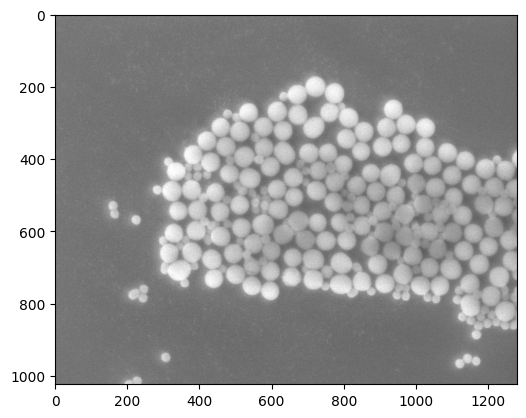

In [14]:
import os
import cv2
import numpy as np

# Specify the folder path containing TIFF images
tiff_folder = './Images/CEA2_MEB'
image_filename = "Image_4_01.tif"
image_path = os.path.join(tiff_folder, image_filename)

image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

import matplotlib.pyplot as plt
plt.imshow(image,cmap='gray')

In [8]:
model = PSPNet('resnet34', encoder_weights='imagenet')
model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7fcdf4662f50>>

In [9]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 384, 384, 3)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 384, 384, 3)          9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 390, 390, 3)          0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                            

In [15]:
print(image.shape)


(1024, 1280, 3)


In [16]:
im = cv2.resize(image,(384, 384))
im = im.reshape(1, 384,384, 3)
print(im.shape)
segmented = model.predict(im)


(1, 384, 384, 3)
1/1 [==============================] - 0s 428ms/step


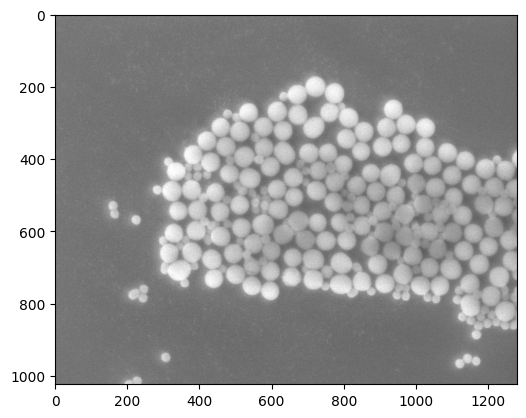

In [17]:
import matplotlib.pyplot as plt 
plt.imshow(image)

In [21]:
segmented.shape
# segmented is a 21 channel image, which can be used to segment the image. 


(1, 384, 384, 21)

In [18]:
from sklearn.cluster import MiniBatchKMeans
print(segmented.shape)
# segment the image into 2 clusters : foreground and background
clustering = MiniBatchKMeans(n_clusters=2)
yes_no = clustering.fit_predict(segmented.reshape(-1,21))



(1, 384, 384, 21)


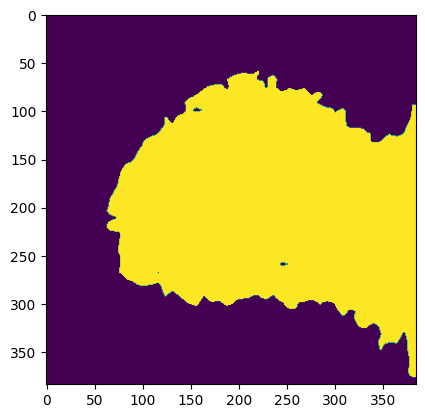

In [19]:
yes_no = yes_no.reshape(384,384,1)
plt.imshow(yes_no)